In [1]:
from bs4 import BeautifulSoup
import os
import pandas as pd
import requests
import json
import random
import warnings
import time
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
import plotly.graph_objects as go
import plotly.express as px
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv (r'D:\cars.csv')

# outliers

<AxesSubplot:xlabel='hand', ylabel='Density'>

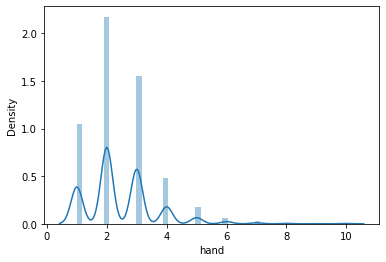

In [3]:
sns.distplot(df['hand'])

### we droped all cars that changed more then 4 hands

In [4]:
df.hand[df.hand>4]=np.nan

<AxesSubplot:xlabel='hand', ylabel='Density'>

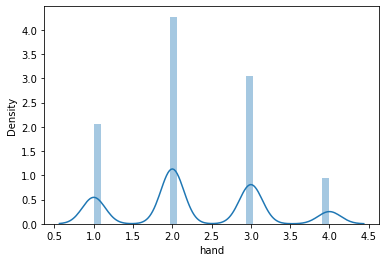

In [5]:
sns.distplot(df['hand'])

### price outliers

<AxesSubplot:xlabel='price'>

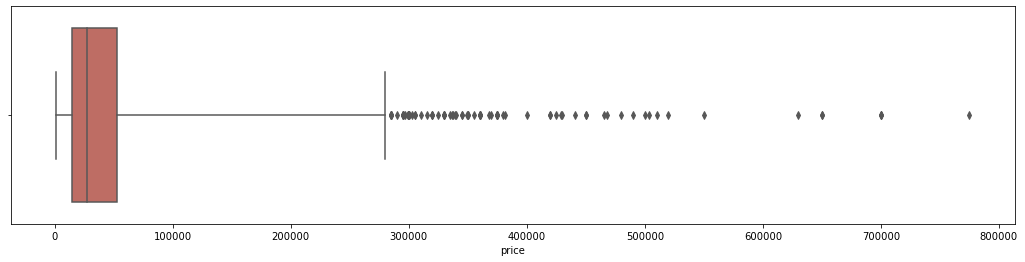

In [6]:
outliers_length = plt.figure(figsize=(18, 4))
sns.boxplot(df['price'], whis=6, color="#CD6155")

In [7]:
Q1 = np.percentile(df['price'], 25)
Q3 = np.percentile(df['price'], 75)
IQR = Q3 - Q1
outliers1 = df[(df['price'] < Q1 - 1.5 * IQR) |
                               (df['price'] > Q3 + 10 * IQR)].index
len(outliers1)

19

In [8]:
df.drop(labels=outliers1, inplace=True)

### kilometers outlier

<AxesSubplot:xlabel='kilometers'>

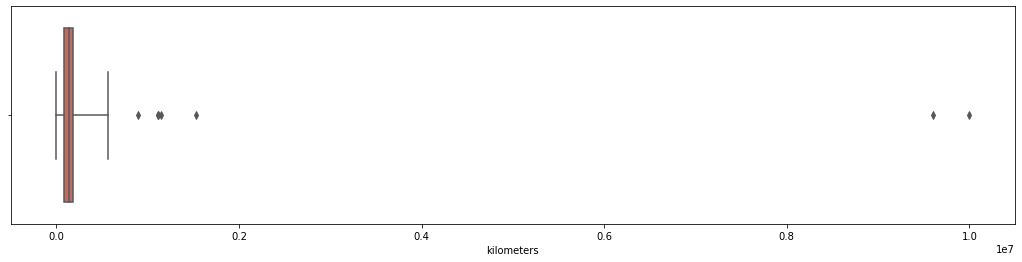

In [9]:
outliers_length = plt.figure(figsize=(18, 4))
sns.boxplot(df['kilometers'], whis=6, color="#CD6155")

In [10]:
Q1 = np.percentile(df['kilometers'], 25)
Q3 = np.percentile(df['kilometers'], 75)
IQR = Q3 - Q1
outliers1 = df[(df['kilometers'] < Q1 - 1.5 * IQR) |
                               (df['kilometers'] > Q3 + 10 * IQR)].index
len(outliers1)

3

In [11]:
df.drop(labels=outliers1, inplace=True)

In [12]:
df.kilometers[df.kilometers<500]=np.nan
df.kilometers[df.kilometers>400000]=np.nan 

### engine outlier

<AxesSubplot:xlabel='engine'>

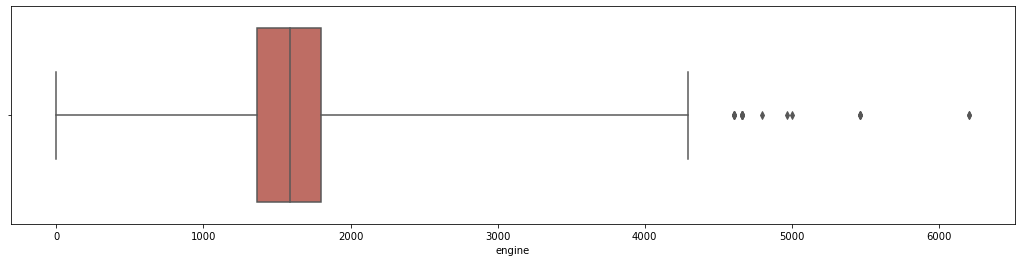

In [13]:
outliers_length = plt.figure(figsize=(18, 4))
sns.boxplot(df['engine'], whis=6, color="#CD6155")

In [14]:
Q1 = np.percentile(df['engine'], 25)
Q3 = np.percentile(df['engine'], 75)
IQR = Q3 - Q1
outliers1 = df[(df['engine'] < Q1 - 1.5 * IQR) |
                               (df['engine'] > Q3 + 10 * IQR)].index
len(outliers1)

20

In [15]:
df.drop(labels=outliers1, inplace=True)

In [16]:
df.isnull().sum()

Unnamed: 0      0
modle           0
price           0
kilometers    492
stick           0
engine          0
year            0
hand          455
last_owner      0
curr_owner      0
city            0
car_id          0
dtype: int64

In [17]:
df = df.dropna()
df.head(5)

,Unnamed: 0,modle,price,kilometers,stick,engine,year,hand,last_owner,curr_owner,city,car_id
0,0,אאודי A4,40000,220000.0,ידנית,1984,2005,4.0,פרטית,פרטית,אזור באר שבע והסביבה,2230947
1,1,אאודי A4,20900,131000.0,אוטומטית,1984,2006,2.0,פרטית,פרטית,אזור באר שבע והסביבה,2234559
3,3,אאודי A4,38000,195000.0,אוטומטית,1984,2006,4.0,פרטית,פרטית,אזור פתח תקוה והסביבה,2254306
4,4,אאודי A4,5000,218073.0,אוטומטית,1781,2006,3.0,פרטית,פרטית,אזור רמלה - לוד,2237862
7,7,אאודי A6,17000,200000.0,אוטומטית,2393,2006,3.0,פרטית,פרטית,אזור נתניה והסביבה,2252216


In [18]:
df.to_csv(r'D:\cars.csv')